In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
from scipy.stats import skew
from scipy.stats.mstats import winsorize

df =pd.read_csv("Cars export 2025-02-05 19-38-54.csv")
df.head()


,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,Manufacturer
0,G Class,2020,159999,Semi-Auto,1350,Petrol,145,21.4,4.0,merc
1,G Class,2020,154998,Automatic,3000,Petrol,150,21.4,4.0,merc
2,SL CLASS,2011,149948,Automatic,3000,Petrol,570,21.4,6.2,merc
3,R8,2020,145000,Semi-Auto,2000,Petrol,145,21.1,5.2,Audi
4,A Class,2019,140319,Semi-Auto,785,Petrol,150,22.1,4.0,merc


In [2]:
# Filtrar solo las columnas numéricas
df_numerico = df.select_dtypes(include=[np.number])

# Calcular la matriz de correlación
matriz_de_correlacion = df_numerico.corr()



In [3]:

print(matriz_de_correlacion)


                year     price   mileage       tax       mpg  engineSize
year        1.000000  0.492491 -0.739664  0.192058 -0.130547   -0.035639
price       0.492491  1.000000 -0.417996  0.307003 -0.295507    0.639356
mileage    -0.739664 -0.417996  1.000000 -0.215558  0.183070    0.107299
tax         0.192058  0.307003 -0.215558  1.000000 -0.451370    0.280770
mpg        -0.130547 -0.295507  0.183070 -0.451370  1.000000   -0.249346
engineSize -0.035639  0.639356  0.107299  0.280770 -0.249346    1.000000


SKEWWW  2.3638117370622487
SKEWWW  1.312156127438247


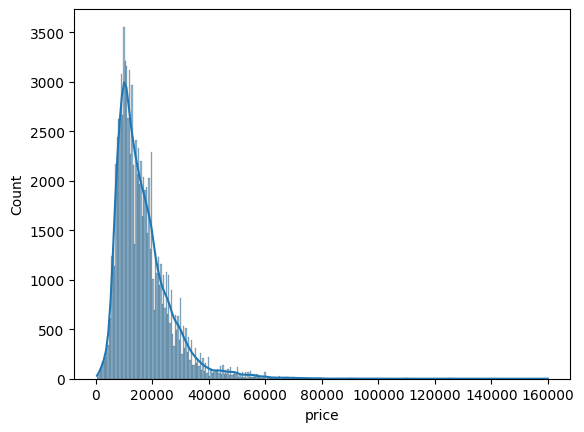

In [4]:

print("SKEWWW ",skew(df_numerico["price"]))
print("SKEWWW " ,skew(df["engineSize"]))

sns.histplot(df_numerico["price"],kde=True)
plt.show()

SKEWWW  -0.07539028556007593


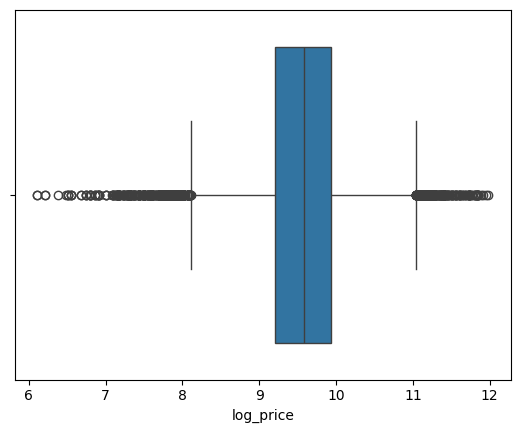

In [5]:
df_numerico["log_price"] =np.log1p(df["price"])
print("SKEWWW ",skew(df_numerico["log_price"]))

sns.boxplot(data=df, x=df_numerico["log_price"]) 
plt.show()

SKEWWW  0.0872419585325532


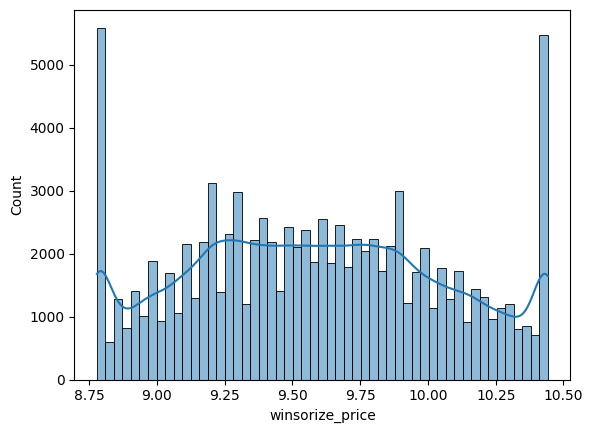

In [6]:
df_numerico["log_price"] =np.log1p(df["price"])


df_numerico["winsorize_price"]  =winsorize(df_numerico["log_price"],limits=[0.05,0.05])
print("SKEWWW ",skew(df_numerico["winsorize_price"]))

sns.histplot(df_numerico["winsorize_price"],kde=True)
plt.show()

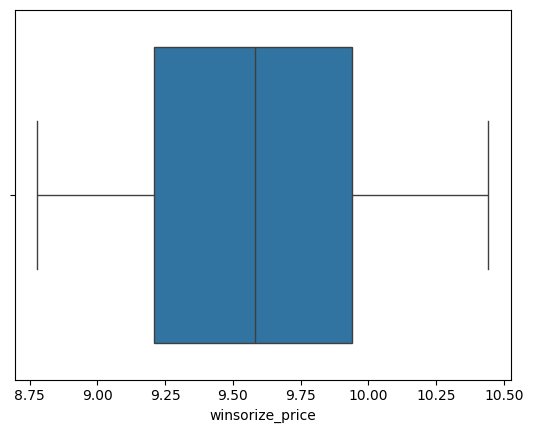

In [12]:
sns.boxplot(data=df, x=df_numerico["winsorize_price"]) 
plt.show()

SKEWWW  1.312156127438247


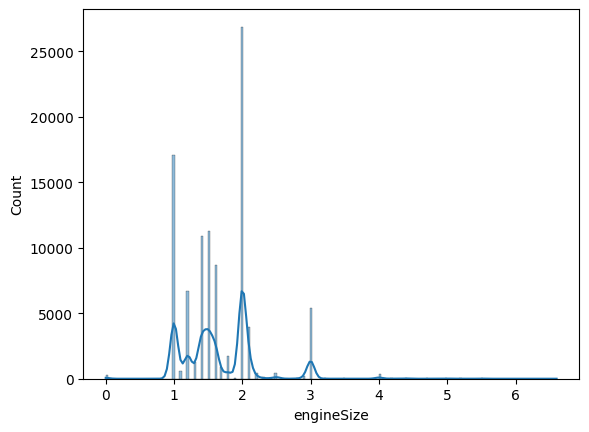

In [7]:
print("SKEWWW " ,skew(df["engineSize"]))

sns.histplot(df_numerico["engineSize"],kde=True)
plt.show()

SKEWWW  0.23795914282124506


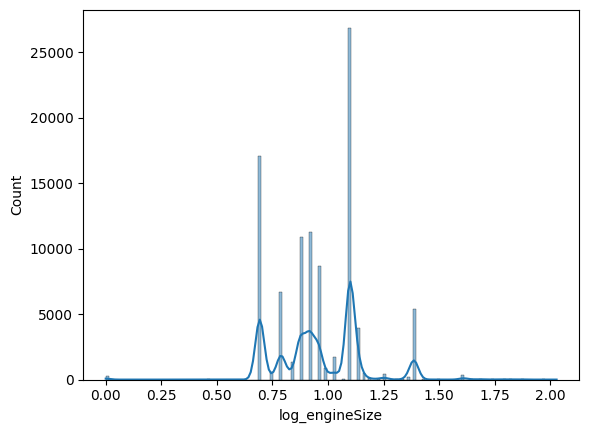

In [8]:
df_numerico["log_engineSize"] =np.log1p(df["engineSize"])
print("SKEWWW ",skew(df_numerico["log_engineSize"]))

sns.histplot(df_numerico["log_engineSize"],kde=True)
plt.show()

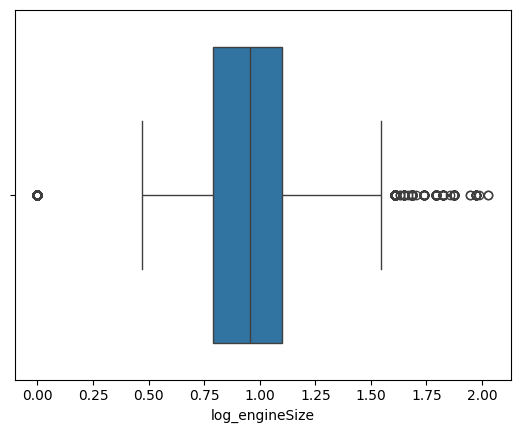

In [9]:
sns.boxplot(data=df, x=df_numerico["log_engineSize"]) 
plt.show()

SKEWWW  0.33533199884970877


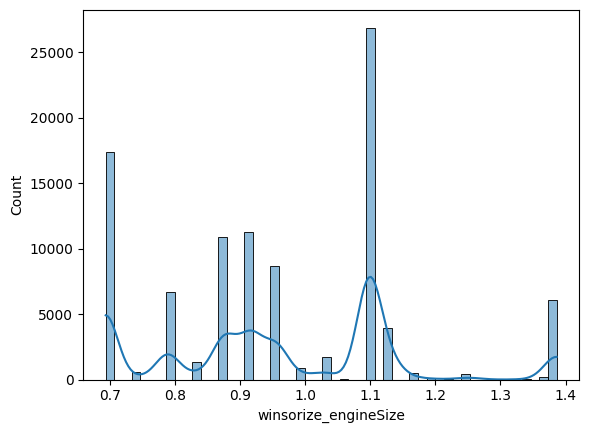

In [10]:
df_numerico["winsorize_engineSize"]  =winsorize(df_numerico["log_engineSize"],limits=[0.05,0.05])
print("SKEWWW ",skew(df_numerico["winsorize_engineSize"]))

sns.histplot(df_numerico["winsorize_engineSize"],kde=True)
plt.show()

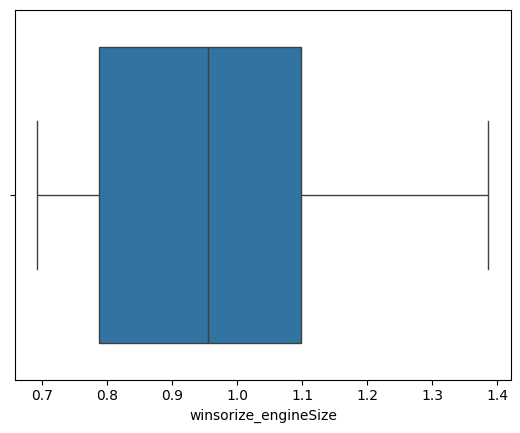

In [11]:
sns.boxplot(data=df, x=df_numerico["winsorize_engineSize"]) 
plt.show()